<a href="https://colab.research.google.com/github/ghn9zh/ds3001-HW5/blob/main/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [1]:
! git clone https://github.com/ds4e/knn

Cloning into 'knn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 63 (delta 16), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (63/63), 24.29 MiB | 9.69 MiB/s, done.
Resolving deltas: 100% (21/21), done.


**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression involves predicting a contiouns numerical value based on input data, such as predicting house prices or temperatures. Classficiation involves predicting a discrete catergory or class label, such as idenifying wheher an email is spam or not. While regression focuses on estimating quantities, classification focuses on assignging data points to predefined categories.

2. A confusion table is a tool used to evaluate the preformace of a classification model by comparing the predicted class labels with the actual class labels. It displays the number of true postive, true negatives, false positives, and false negatives which helps to asses the model's accuracy, precisions, recall, and overall effectiveness. By analyzing the confusion tbale, we can identify specific types of errors the model makes and gain insight into areas where it may be underpreforming.

3. The sum stardard of errors (SSE) quantifies the total squared difference between the actual values and the predicted values made by a regression model. It measures how well the model's prediction align with the observed data, with a lower SSE indicating a better fit. SSE reflects the overall error of the model, where large errors contribute more heavily due to the squaring, helping to highlight prediction inaccuracies.

4. Overfitting and underfitting are two common problems in nachine learning models. Overfitting happens when a model learns the training data too well, including its noise and outliers, resulting in high accuracy on the training data but poor generalization to new data. Underfitting happens when a model is too simple to capture the patterns in the data, leading to poor preformance on the training and testing data. The key is to find a balance where the model captures the essential trends without being overly complex.

5. Splitting the data into training and testing sets allows us to evaluate how well a model generalizes to new data. By using the trainging set to build the model and the testing set to assess its prefromace, we can detect issues like overfitting and underfitting. Chosing the optimal value of k (number of neighbors) based on accuracy or SSE from the test set ensures that the model is neither too simple or too complex. This imporves its ability to make accurate predictions on real world data.

6. Reporting a class label as a prediction is simple and easy to intepret and provides a clear answer for decision-making tasks. However, it lacks informations about the model's confidence in prediction, which can be important in cases where uncertainty matters. On he other hand, providing probability distribution over class labels gives a deeper understnading of the model's confidence in each possible outcome, allowing for more nuance decision making. The downside is the interpretting proababilities can be more complex and may require addition steps to act on the predictions, especially in high-stakes scenarios.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
import pandas as pd
#Load the Dataset
file_path= '/content/knn/data/USA_cars_datasets.csv'
df = pd.read_csv(file_path)
df=df[['price','year','mileage']]
missing_values=df.isnull().sum()
df_head=df.head()
df_shape=df.shape
print(missing_values)
print(df_head)
print(df_shape)

price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [3]:
#Part 2: Normalize
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['year','mileage']]=scaler.fit_transform(df[['year','mileage']])
df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [5]:
#Part 3: Split the Data
from sklearn.model_selection import train_test_split
X=df[['year','mileage']]
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('Training Set Shape: ',X_train.shape)
print('Testing Set Shape: ',X_test.shape)

Training Set Shape:  (1999, 2)
Testing Set Shape:  (500, 2)


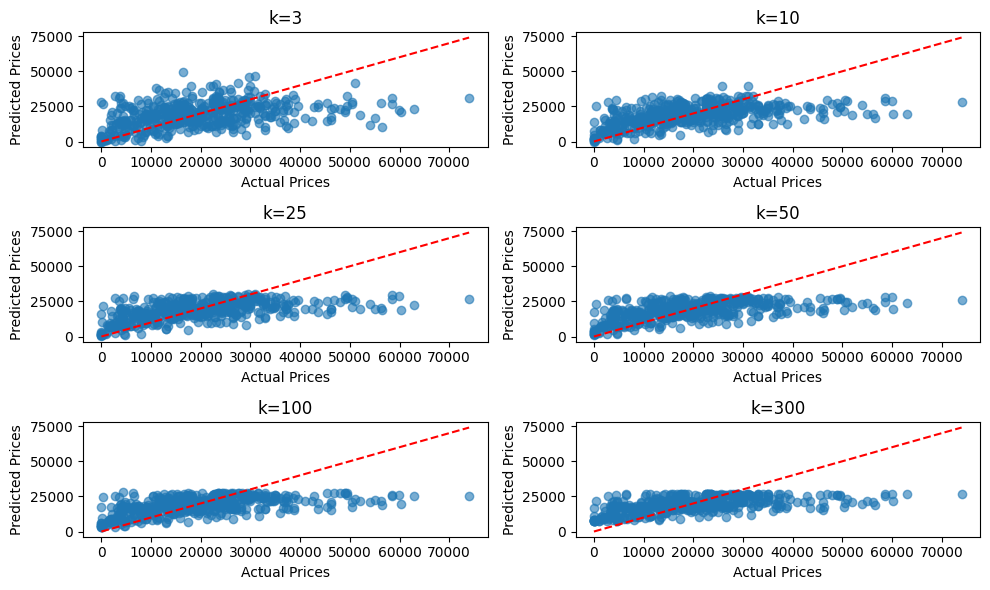

k=3: MSE=148065935.52
k=10: MSE=117399126.11
k=25: MSE=112576160.82
k=50: MSE=110202549.30
k=100: MSE=112253702.97
k=300: MSE=114496092.29


In [8]:
#Part 4: Use KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values=[3,10,25,50,100,300]
mse_lists={}
plt.figure(figsize=(10,6))

for idx, k in enumerate(k_values, 1):
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train,y_train)

  y_pred=knn.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  mse_lists[k] = mse

  #Plot
  plt.subplot(3, 2, idx)
  plt.scatter(y_test, y_pred, alpha=0.6)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
  plt.xlabel('Actual Prices')
  plt.ylabel('Predicted Prices')
  plt.title(f'k={k}')

plt.tight_layout()
plt.show()

#Print MSE results
for k, mse in mse_lists.items():
  print(f'k={k}: MSE={mse:.2f}')

#Patterns I noticed:
#As k increases, the model transition from overfitting to underfitting.
#With smaller k values (ex: 3), the model closely follows the traing data,
#leading to high vairance and scattered predictions. As k increases, the model
#becomes smoother and more generalized, but very large k values (ex: 300) can
#oversimplify the data, leading to underfitting and less acurate predictions.


In [9]:
#Part 5: Determine Optimal k
optimal_k=min(mse_lists,key=mse_lists.get)
print(f'Optimal k: {optimal_k}')

Optimal k: 50


Part 6:
As the value of k varied, the scatterplaots revealed a clear shift between overfitting and underfitting. With smaller k values, the model overfit the data, closely following the training set and resulting in high variance, hwere predictions were scattered and ofen deviated siginificantly from the actual prices. As k increased to an optiaml range, the predictions became more balanced, reducing variance while still capturing the underlying tredns in the data. However, when k grew too alrge, the model began to underfit, smoothing out important patterns and leading to high bias, as it failed to account for local variations in price. This balance between overfitting and underfitting highlights the importance of selecting an appropriate k to achieve the best model preformance. With k=50, the model achieves a balance between bias and variance, producing predictions that align more closey with actual values while avoiding overfitting.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.